In [1]:
# Importing 

import pandas as pd
import numpy as np
import matplotlib as plt


## Owid energy data

Contains long history of energy data per country with extensive division of energy types and both percentages and nominals.


In [2]:
# Source
# https://github.com/owid/energy-data

df = pd.DataFrame()

df = pd.read_csv('downloads/owid-energy-data.csv')

df.head(20)

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AFG,Afghanistan,1905,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AFG,Afghanistan,1906,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,AFG,Afghanistan,1907,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,AFG,Afghanistan,1908,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AFG,Afghanistan,1909,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='year'>

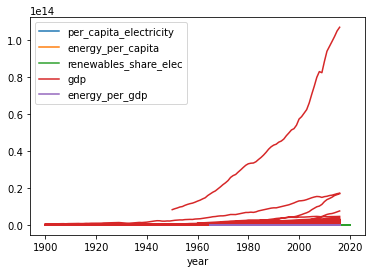

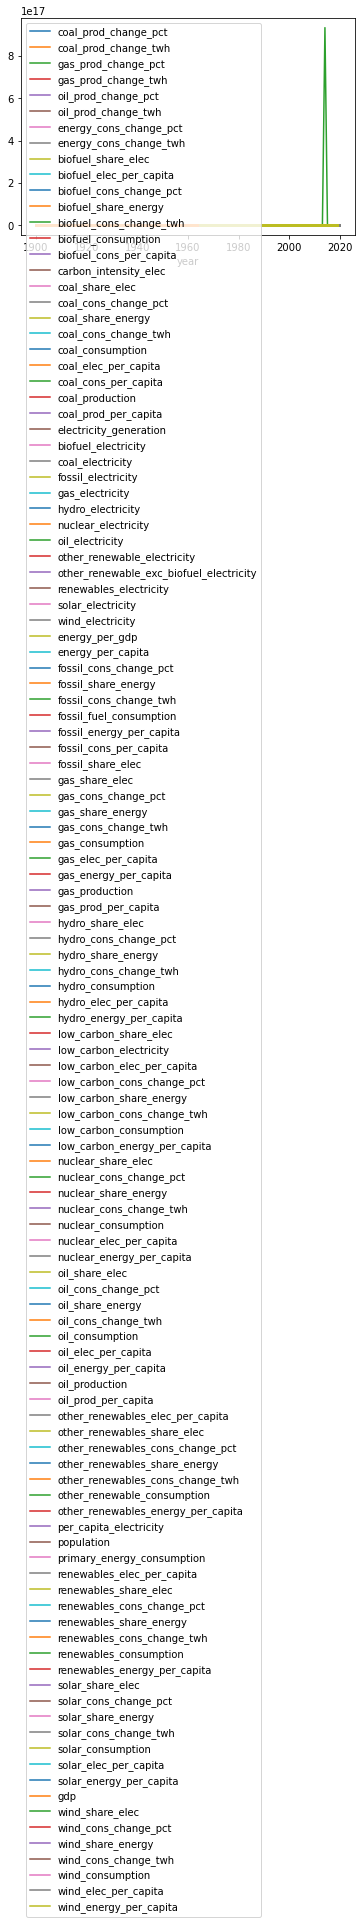

In [3]:
# TEMP - NEVERMIND THIS CELL
# figuring out the data with slicing, outputs & plots

df2 = df[['year', 'iso_code', 'per_capita_electricity', 'energy_per_capita', 'renewables_share_elec', 'gdp', 'energy_per_gdp']]

#df3 = df2['year']

#df3['per_capita_electricity'] = 
df3 = df2.groupby('year')['per_capita_electricity'].sum()

df3.head()

df3.to_excel('output.xls')

df2.plot(x='year')#,y_label='iso_code') #,subplots=True)

df.plot(x='year')


## Global energy data

Very straight-forward data set with manageable amount of data about the volumes of different energy types.


,Entity,Code,Year,Wind (TWh; substituted energy),Oil (TWh; substituted energy),Nuclear (TWh; substituted energy),Hydropower (TWh; substituted energy),Traditional bimass (TWh; substituted energy),Other renewables (TWh; substituted energy),Biofuels (TWh; substituted energy),Solar (TWh; substituted energy),Coal (TWh; substituted energy),Gas (TWh; substituted energy)
52,World,OWID_WRL,2000,87,42897,7169,7367,12500,517,116,3,27417,24000
53,World,OWID_WRL,2001,106,43278,7324,7131,12500,530,127,4,27853,24331
54,World,OWID_WRL,2002,143,43639,7393,7216,12470,566,149,5,28945,25053
55,World,OWID_WRL,2003,171,44610,7197,7159,12329,594,185,6,31497,25753
56,World,OWID_WRL,2004,230,46256,7476,7636,12160,637,209,8,33664,26736
57,World,OWID_WRL,2005,280,46824,7448,7845,12076,685,246,11,36171,27464
58,World,OWID_WRL,2006,355,47367,7493,8093,11993,726,313,15,38071,28175
59,World,OWID_WRL,2007,454,47958,7295,8179,11911,783,424,21,40224,29325
60,World,OWID_WRL,2008,582,47566,7227,8599,11829,833,574,33,40770,30025
61,World,OWID_WRL,2009,724,46654,7081,8533,11747,891,636,55,40149,29411


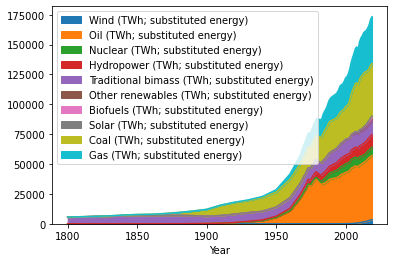

In [4]:
# Source
# https://ourworldindata.org/energy-production-consumption

df_energy = pd.read_csv('downloads/global-energy-substitution.csv')

df_energy.plot(x='Year', kind='area')

df_energy.tail(20)

## Paper production data

A very simple data set showing paper production per type over the past 10 years

,Year,Packaging paper and board,Graphic paper,Others
0,2008,193501,151489,45922
1,2009,190208,136385,44094
2,2010,204469,142866,46564
3,2011,209982,142047,46946
4,2012,213955,138756,47275
5,2013,219455,134600,48550
6,2014,225624,131078,49789
7,2015,231022,125501,51072
8,2016,235544,122624,52715
9,2017,245782,119678,54227


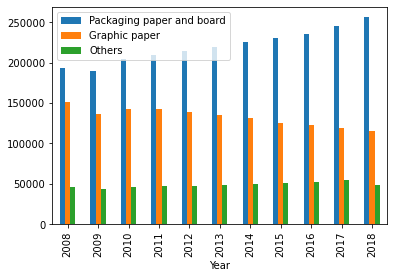

In [27]:
# Source 
# https://www.statista.com/statistics/270317/production-volume-of-paper-by-type/
# Global paper production volume from 2008 to 2018 by type (in 1,000 metric tons)

df_paper_prod = pd.read_excel('downloads/data_production-volume-of-paper-by-type-2008-2018.xlsx')

df_paper_prod.plot(x='Year', kind='bar')

df_paper_prod.head(10)

## Paper recycling data

Recycling per country for few decades. Paper and cardboard packaging.

,DATAFLOW,LAST UPDATE,freq,waste,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
174,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,EU27_2020,2005,73.2,s
175,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,EU27_2020,2006,75.4,s
176,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,EU27_2020,2007,78.3,s
177,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,EU27_2020,2008,81.0,s
178,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,EU27_2020,2009,83.3,s
179,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,EU27_2020,2010,83.8,s
180,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,EU27_2020,2011,82.7,s
181,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,EU27_2020,2012,83.5,NaN
182,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,EU27_2020,2013,84.0,NaN
183,ESTAT:CEI_WM020(1.0),18/06/21 23:00:00,A,W150101,RT,EU27_2020,2014,84.1,NaN


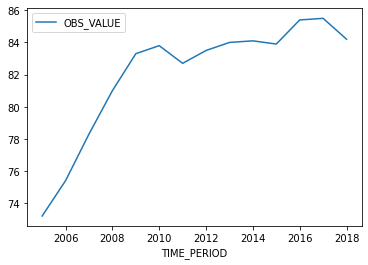

In [24]:
# Source
# https://ec.europa.eu/eurostat/databrowser/view/cei_wm020/default/table?lang=en

df_paper_rec_orig = pd.read_csv('downloads/estat_cei_wm020_filtered_en.csv')

#df_paper_rec_orig.head()
#df_paper_rec_orig['geo'] == 'EU27_2020'
#df_paper_rec_orig[df_paper_rec_orig['geo'] == 'EU27_2020']

# Restricting the view onto the EU27_2020 level for now

df_paper_rec = df_paper_rec_orig[df_paper_rec_orig['geo'] == 'EU27_2020']

df_paper_rec.plot(x='TIME_PERIOD')

df_paper_rec.head(20)